<a href="https://colab.research.google.com/github/Vyshnavisangaraboina/DATA_MINING/blob/main/Lab_07_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
#create a pynthetic dataset
np.random.seed(42)
data = np.random.normal(0, 1, 100) #normal distribution
outliers = np.random.uniform(5, 10, 5) #artificial outliers

In [36]:
data_series = pd.Series(data)
data_series.describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [37]:
df.describe()

,value
count,105.000000
mean,0.236332
std,1.794453
min,-2.619745
25%,-0.562288
50%,-0.035826
75%,0.611676
max,9.714549


In [38]:
df.min()

,0
value,-2.619745


In [39]:
df.max()

,0
value,9.714549


In [27]:
data_with_outliers = np.concatenate([data, outliers])

In [28]:
#convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=['value'])

In [29]:
#step 1: detect outliers using IQR method
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3-Q1
lower_bound=Q1 -1.5* IQR
upper_bound=Q3 -1.5* IQR

In [30]:
print(lower_bound)

-2.3232332563637335


In [31]:
print(upper_bound)

-1.1492694382818929


In [42]:
print(Q1)

-0.5622875292409727


In [43]:
print(Q3)

0.6116762888408679


In [44]:
print(IQR)

1.1739638180818406


In [32]:
#Identifying outliers based on IQR
outliers_iqr=df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

In [33]:
#step 2:detect outliers using Z_scores method
z_scores = stats.zscore(df['value'])
outliers_zscore = df[np.abs(z_scores) > 3]

Text(0.5, 1.0, 'Boxplot for outliers detection')

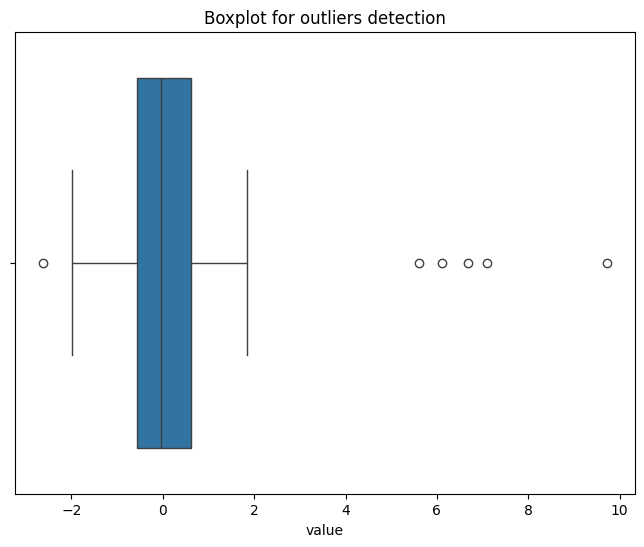

In [35]:
#step 3: visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['value'])
plt.title("Boxplot for outliers detection")

In [45]:
df_capped = df.copy()
df_capped['value'] = np.clip(df_capped['value'], lower_bound, upper_bound)

In [48]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['value'] >= lower_bound) & (df_removed['value'] <=upper_bound)]

In [49]:
df_imputed = df.copy()
median_value = df['value'].median()
df_imputed['value']=np.where((df_imputed['value'] < lower_bound) | (df_imputed['value'] > upper_bound), median_value, df_imputed['value'])

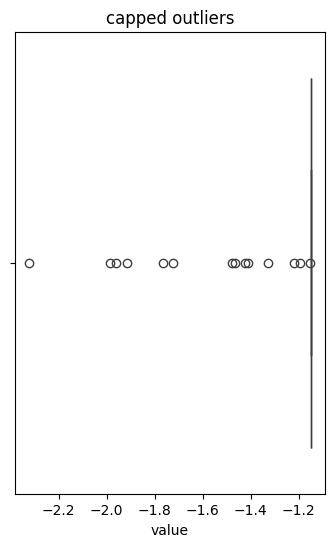

In [51]:
#step 5:visualize handled data
#capped data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['value'])
plt.title("capped outliers")
plt.show()

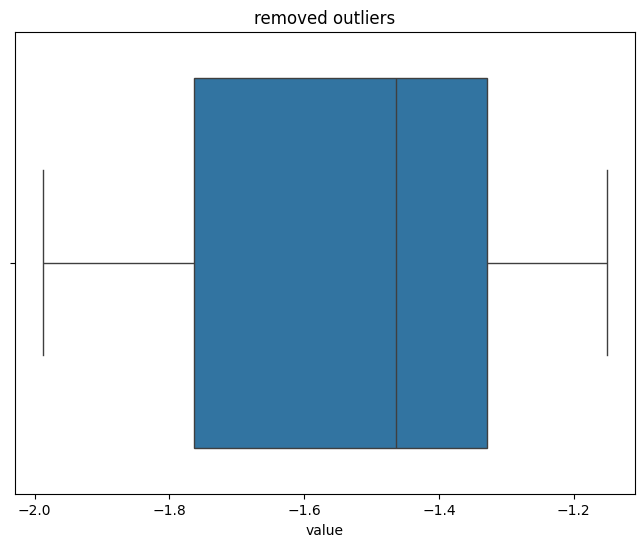

In [52]:
#remove data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_removed['value'])
plt.title("removed outliers")
plt.show()

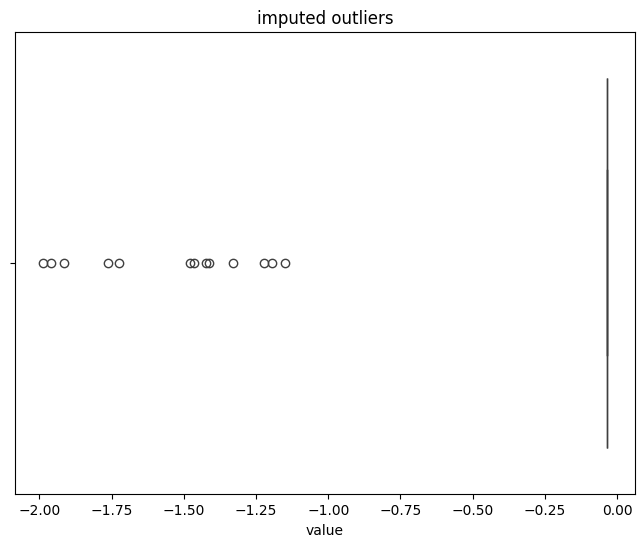

In [53]:
#imputed data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_imputed['value'])
plt.title("imputed outliers")
plt.show()
